In [637]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as m
import statsmodels.api as sm
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV,train_test_split
plt.style.use('dark_background')

## Data overview

> I will be using a dataset of codon prevelence in various organisms. Each row contains the kingdom, species, number of codons, type of DNA, and the frequencies of each codon for an organism.

In [531]:
X = pd.read_csv('codon_usage.csv')

codons = X.columns[5:]
print('Columns:\n',X.columns)
print('\nDimensions:\n',X.shape)
print('\n',X.head(10))

Columns:
 Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')

Dimensions:
 (13028, 69)

   Kingdom  DNAtype  SpeciesID  Ncodons  \
0     vrl        0     100217     1995   
1     vrl        0     100220     1474   
2     vrl        0     100755     4862   
3     vrl        0     100880     1915   
4     vrl        0     100887    22831   
5     vrl        0     101029     5274   
6     vrl        0     101688     3042   
7     vrl        0     101764     2801

/Users/Bova/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [532]:
X.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007107,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025113,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031123,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [533]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

## Data Cleaning

In [534]:
print('Missing Values')
X[pd.isna(X)].sum().sum()

Missing Values


0.0

> No missing values, but it seems like there are some non-numeric values in UUU and UUC columns that need to be addressed

In [535]:
print(X.UUU[X.UUU=='non-B hepatitis virus'])
print(X.UUC[X.UUC=='-'])

486    non-B hepatitis virus
Name: UUU, dtype: object
5063    -
Name: UUC, dtype: object


> The culprits are 2 eroneous values -- will drop both rows.

In [536]:
X.drop([486,5063],inplace=True)
X.reset_index(inplace=True)

X.UUU = pd.to_numeric(X.UUU)
X.UUC = pd.to_numeric(X.UUC)
X[['UUU','UUC']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13026 entries, 0 to 13025
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UUU     13026 non-null  float64
 1   UUC     13026 non-null  float64
dtypes: float64(2)
memory usage: 203.7 KB


In [537]:
# Conver DNA type to categorical 
#(there were several sub-types of plastid that I'll label as 'plastid' due to their low occurence in the data)
dna_dict = {0:'genomic',1:'mitochondrial',2:'chloroplast',3:'plastid',4:'plastid',5:'plastid',
            6:'secondary_endosymbiont',7:'plastid',8:'leucoplast',9:'NA',10:'proplastid',11:'plastid', 
            12:'plastid'}
X.DNAtype = X.DNAtype.map(dna_dict)
X.groupby('DNAtype').DNAtype.count()

DNAtype
NA                           2
chloroplast                816
genomic                   9265
mitochondrial             2899
plastid                     43
secondary_endosymbiont       1
Name: DNAtype, dtype: int64

In [538]:
# dropping unlabeled dna types
X = X.loc[X.DNAtype!='NA'].drop('index',axis=1).reset_index(drop=True)

In [539]:
X.groupby('DNAtype').DNAtype.count()

DNAtype
chloroplast                816
genomic                   9265
mitochondrial             2899
plastid                     43
secondary_endosymbiont       1
Name: DNAtype, dtype: int64

In [540]:
kingdom_map = {'arc':'archaea','bct':'bacteria','inv':'animalia',
               'mam':'animalia','phg':'virus','plm':'plasmid','vrt':'animalia',
               'pri':'animalia','pln':'plantae','rod':'animalia','vrl':'virus'}

X.Kingdom = X.Kingdom.map(kingdom_map)
X.groupby('Kingdom').Kingdom.count()

Kingdom
animalia    4389
archaea      126
bacteria    2919
plantae     2521
plasmid       18
virus       3051
Name: Kingdom, dtype: int64

Text(0.5, 1.0, 'Dataset Genome by Kingdom Counts')

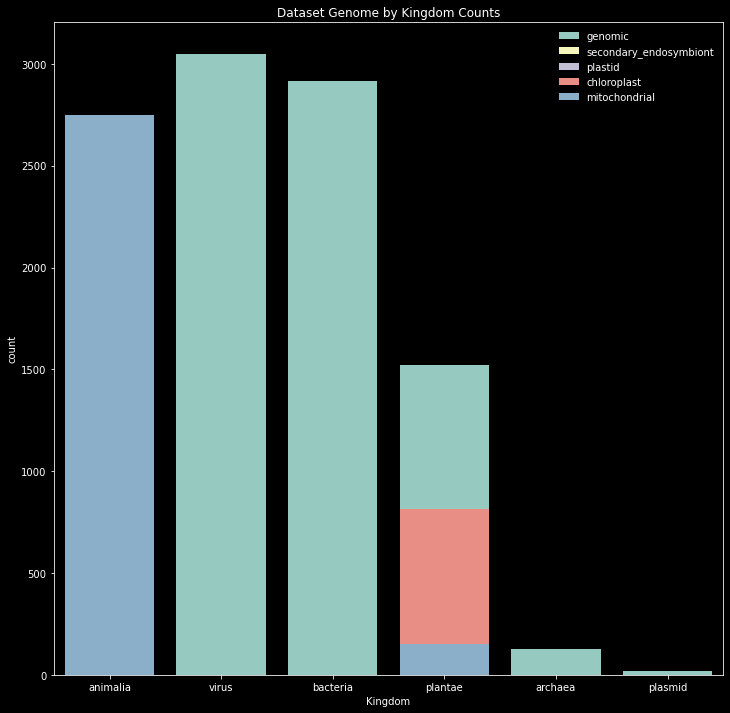

In [548]:
fig,ax = plt.subplots(figsize =(12,12))

sns.countplot(data=X,x='Kingdom',
             hue='DNAtype',
             dodge=False,
             order=['animalia','virus','bacteria','plantae','archaea','plasmid'])
ax.legend(loc='upper right',
          frameon=False)
plt.title('Dataset Genome by Kingdom Counts')

In [549]:
# Remove labels
kingdom = X.pop('Kingdom')
species = X.pop('SpeciesName')
spc_ids = X.pop('SpeciesID')

## Data Prep

In [550]:
# Scale numeric data
numeric = ['Ncodons']+list(codons)
scaler = StandardScaler()
X[numeric] = scaler.fit_transform(X[numeric])

In [576]:
# Create dummies for DNAtype -- genomic DNA column as most frequent dropped (genomic)
X_dummies = pd.get_dummies(X,columns=['DNAtype'],drop_first=True)
dummy_columns = X_dummies.columns

## PCA

In [698]:
## PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_dummies)

print('Shape:\n',X_pca.shape)
X_pca = pd.DataFrame(X_pca,columns=[f'Component_{i+1}' for i in range(X_pca.shape[1])])

print('\nExplained Variance:\n',pca.explained_variance_ratio_)

X_pca[dummy_columns] = X_dummies

Shape:
 (13024, 42)

Explained Variance:
 [0.29258537 0.18584532 0.05508698 0.03976581 0.03398034 0.02934
 0.02292237 0.02170566 0.01743035 0.01635215 0.01513445 0.01417143
 0.01356692 0.01268035 0.01237646 0.01183493 0.01156483 0.01044656
 0.00947181 0.00914454 0.00813223 0.00759849 0.007389   0.00713803
 0.00664766 0.00636171 0.00596755 0.00561989 0.00547588 0.00541608
 0.0051769  0.004972   0.00489154 0.00448205 0.00422519 0.00414678
 0.00390664 0.00383442 0.00372304 0.00352995 0.00348123 0.00332927]


In [702]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
area = pd.DataFrame({'Cumulative Variance':cumulative_explained_variance,
                     'Number of Components':[c for c in range(len(cumulative_explained_variance))]})

Text(0.5, 1.0, 'Cumulative Variance of PCA Components')

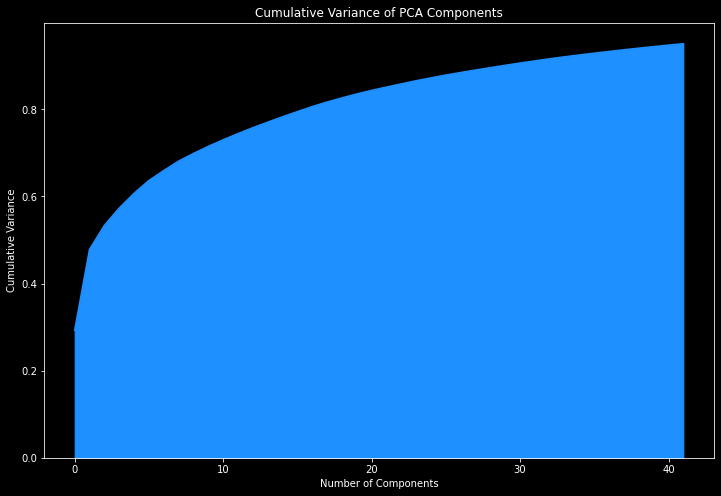

In [717]:
fig,ax = plt.subplots(figsize =(12,8))

area.plot.area(x='Number of Components',
               y='Cumulative Variance',
               legend=False,
               color='dodgerblue',
               ax=ax)

plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance of PCA Components')

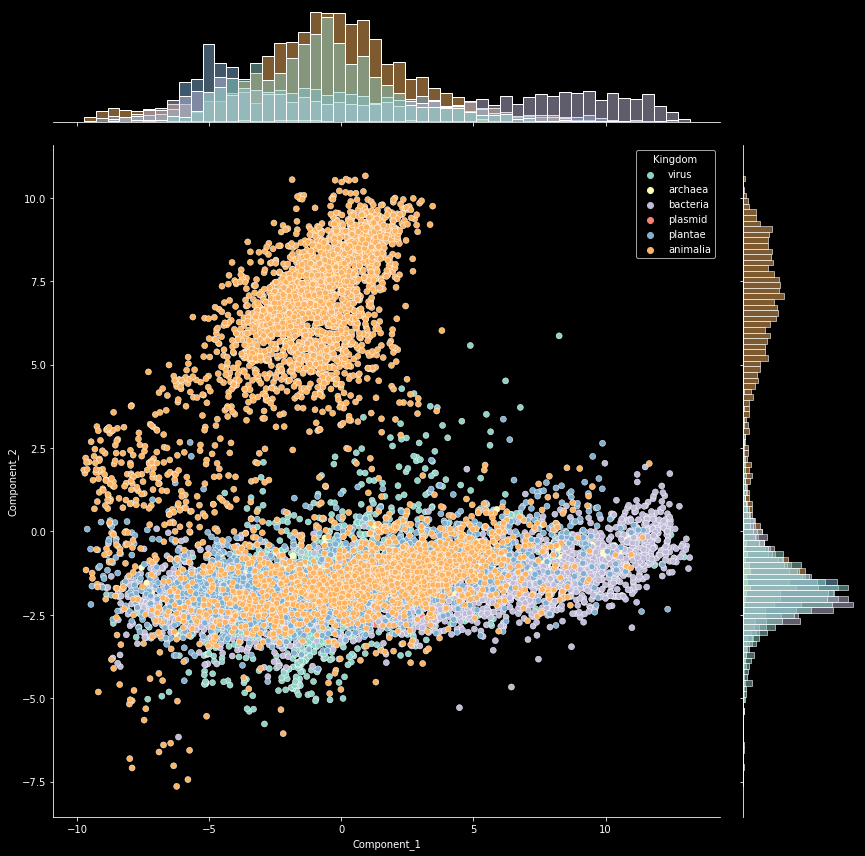

In [599]:
# Looking at the top 2 principle components
g = sns.JointGrid(data=X_pca,
                  x='Component_1',
                  y='Component_2',
                  hue=kingdom,
                  height=12)
g.plot(sns.scatterplot, sns.histplot)

> Top 2 components don't makes 2 obvious clusters -- one is exclusicely animalia, the other all kingdoms (including animalia).

## Agglomerative Clustering

In [603]:
clustering = AgglomerativeClustering(n_clusters=None,distance_threshold=10).fit(X_pca)

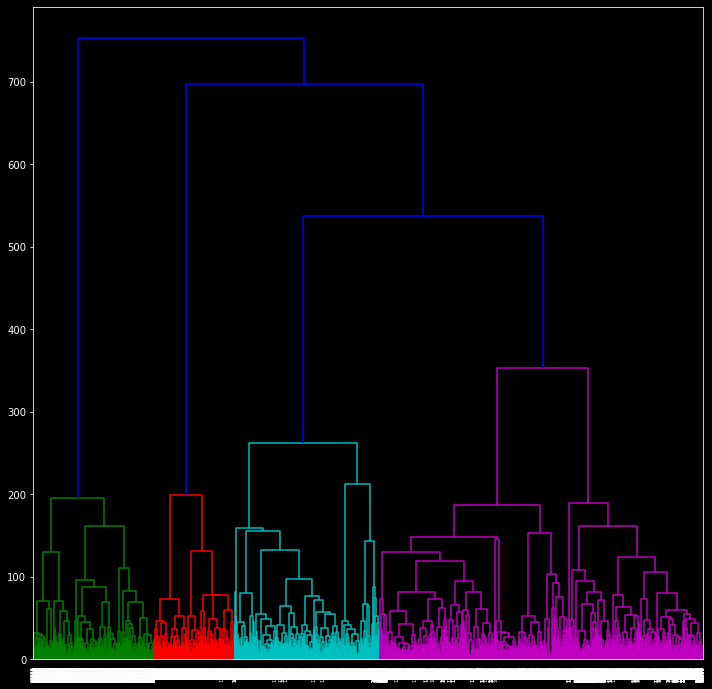

In [604]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize =(12,12))
Dendrogram = shc.dendrogram((shc.linkage(X_pca, method ='ward')))

> Heirarchical clustering yields 4 clusters.

## Kmeans clustering

In [622]:
kmeans = KMeans(n_clusters=4)
kmeans_fitted = kmeans.fit(X_pca)
y_pred = kmeans_fitted.predict(X_pca)

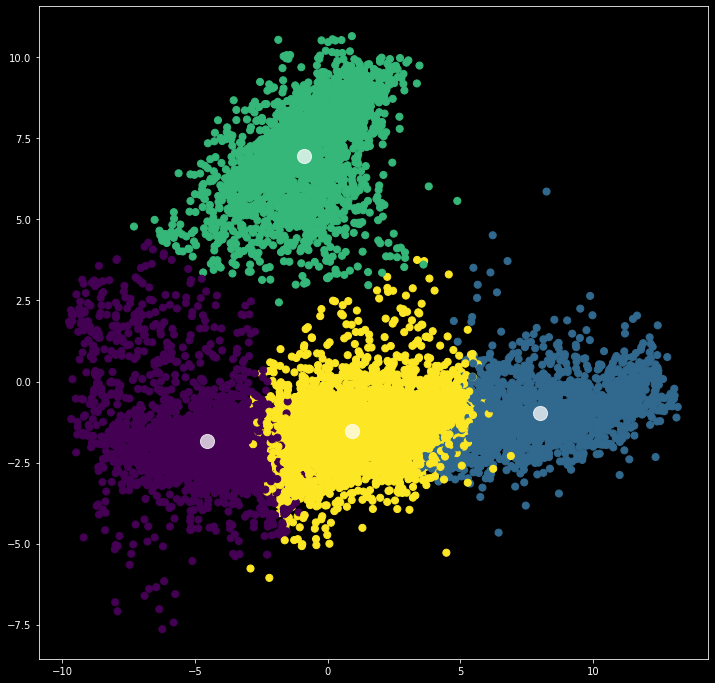

In [623]:
plt.figure(figsize =(12,12))

plt.scatter(X_pca.Component_1, 
            X_pca.Component_2, 
            c=y_pred, 
            s=50, 
            cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], 
            centers[:,1], 
            c='white', 
            s=200, 
            alpha=0.75)

> These clusters don't really correspond to the plots above.

Text(0, 0.5, 'Sum of Squared Distances')

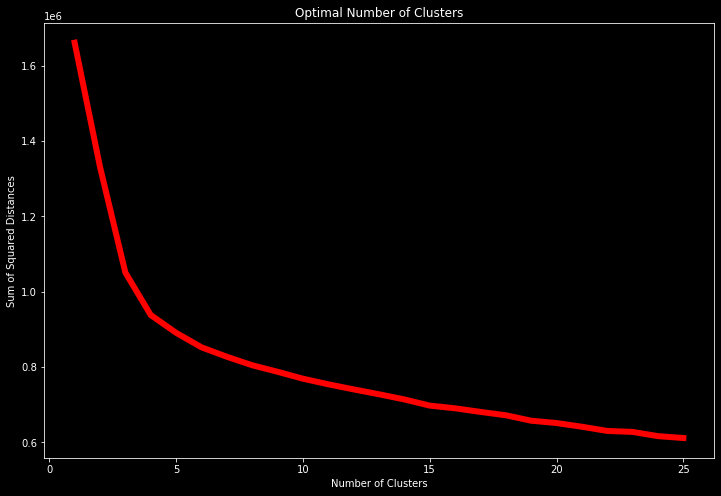

In [620]:
# Find optimal cluster number
clusters = [k for k in range(1,26)]

inertia = [KMeans(n_clusters=k).fit(X_pca).inertia_ for k in clusters]

plt.figure(figsize =(12,8))
plt.plot(clusters,
         inertia,
         color='red',
         linewidth=6)
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')

> The elbow of the plot is around 4, which matches the dendrogram.
## Predicting clusters with logistic regression

In [639]:
# Predict cluster using logistic regression
logit = LogisticRegression(solver='liblinear') # default solver (lgfgs) does not converge
logit_fit = logit.fit(X_dummies,y_pred)

y_logit_pred = logit.predict(X_dummies)
print(f'Accuracy:\n\t{accuracy_score(y_pred,y_logit_pred)}')
pd.crosstab(y_pred,y_logit_pred)

Accuracy:
	0.9773495085995086


col_0,0,1,2,3
row_0,,,,
0,3652,0,5,122
1,0,1777,0,77
2,1,0,2351,3
3,55,25,7,4949


> Logistic regression results are pretty good.

Text(0, 0.5, 'Error')

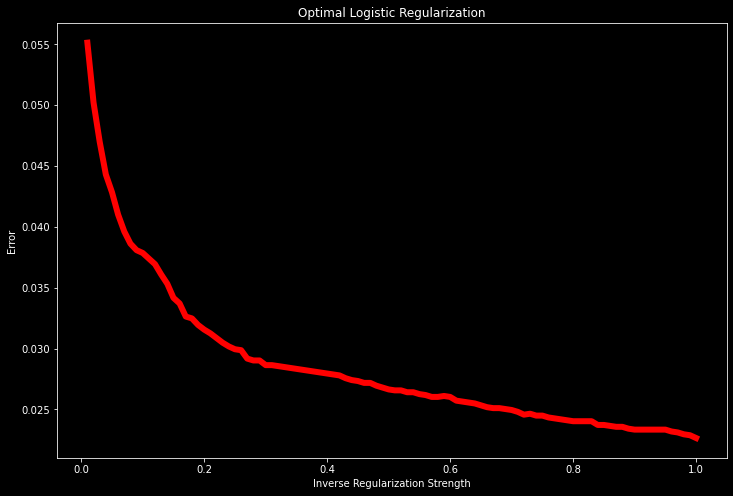

In [646]:
# Tune regularization parameter
regularization =  [c/100 for c in range(1,101)]

errors = [1-(accuracy_score(y_pred,
                           LogisticRegression(solver='liblinear',C=c).\
                                              fit(X_dummies,y_pred).   \
                                              predict(X_dummies))) for c in regularization]


plt.figure(figsize =(12,8))
plt.plot(regularization,
         errors,
         color='red',
         linewidth=6)
plt.title('Optimal Logistic Regularization')
plt.xlabel('Inverse Regularization Strength')
plt.ylabel('Error')

> Looks like the default value for C, 1, is the optimal

In [647]:
# Predict cluster using logistic regression with optimal C
logit = LogisticRegression(solver='liblinear',C=1) 
logit_fit = logit.fit(X_dummies,y_pred)

y_logit_pred = logit.predict(X_dummies)
print(f'Accuracy:\n\t{accuracy_score(y_pred,y_logit_pred)}')
pd.crosstab(y_pred,y_logit_pred)

Accuracy:
	0.9773495085995086


col_0,0,1,2,3
row_0,,,,
0,3652,0,5,122
1,0,1777,0,77
2,1,0,2351,3
3,55,25,7,4949


> Again, logistic regression performed well at predicting clusters.
## Analysis

In [649]:
B = pd.DataFrame({'Kingdom':kingdom,'Cluster':y_logit_pred})

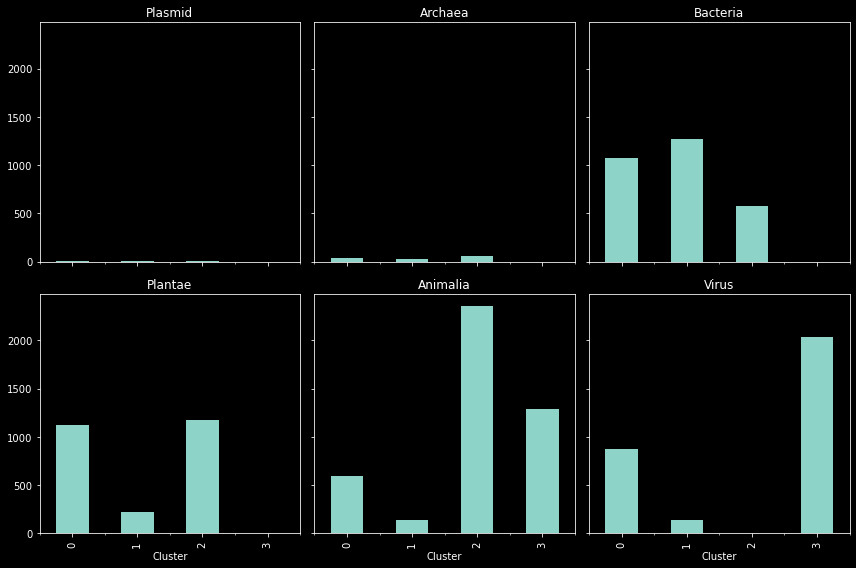

In [690]:
fig, ax = plt.subplots(2,3,figsize=(12,8),sharey=True,sharex=True)

coords_iter = iter([(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)])
for kingdom in set(B.Kingdom):
    i,j = next(coords_iter)
    B[B.Kingdom==kingdom].groupby('Cluster').count().plot(kind='bar',
                                                          legend=None,
                                                          ax=ax[i][j],
                                                          title=kingdom.title())

plt.tight_layout()

> The clusters don't appear to correlate well with the kingdom, suggesting the clusters don't suit for classification (in a biologic sense). There may be some other categorization pattern that the clustering algorithm found.

In [663]:
for i in range(4):
    print(set(X[y_pred==i].DNAtype))

{'mitochondrial', 'secondary_endosymbiont', 'plastid', 'chloroplast', 'genomic'}
{'genomic'}
{'mitochondrial', 'genomic'}
{'plastid', 'mitochondrial', 'chloroplast', 'genomic'}


> The clusters don't seem to correlate well with DNA type particularly well either.

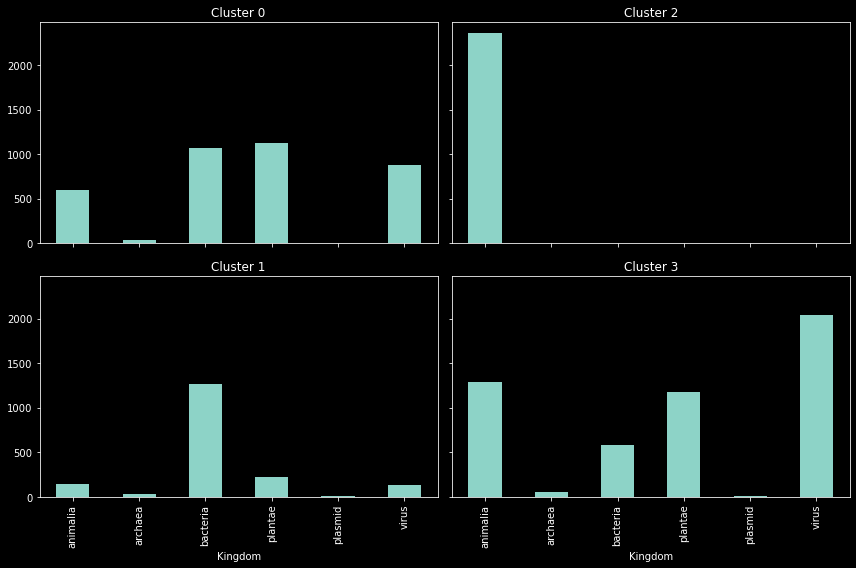

In [693]:
fig, ax = plt.subplots(2,2,figsize=(12,8),sharey=True,sharex=True)

coords = [(0,0),(1,0),(0,1),(1,1)]
for cluster in range(4):
    i,j = coords[cluster]
    B[B.Cluster==cluster].groupby('Kingdom').count().plot(kind='bar',
                                                          legend=None,
                                                          title=f'Cluster {cluster}',
                                                          ax=ax[i][j] )

plt.tight_layout()

> Cluster 2 does seem to represent animalia, thught about 1/3 of anamalia was placed in cluster 3. Cluster 1 is predominantly bacteria, though a good portion of bacteria were placed in cluster 0. The majority of viruses were placed in cluster 3, but the cluster also had a significant number of plants and animals. Cluster 0 is the vaguest of them all, having a good number of bacteria, plants, and viruses.

# Question 2

Find another dataset that is suitable for logistic regression. Run a logistic regression on the data using the statsmodel package. Print the results and interpret the parameter coefficients for each input variable: https://www.statsmodels.org/stable/index.html. Evaluate the model as well. 

> I will be using a dataset obtained from the UCI Machine Learning Repository to predict cancer reccurence in patients diagnosed with breast cancer. The target variable, recurrence, has two levels (yes/no). There are 9 attributes: age, menopausal status (pre,early onset,late onset), size of the tumor, number of nodes involved, if metastates are contained (capped) in lympho nodes, malignancy staging (1,2,3), which breast is effected, quadrant of breast involved, and if the patient underwent radiation.

In [421]:
columns = ['y','age','menopause','tumor_size','node_count','node_caps',
           'malignancy','breast','quadrant','irradiated']
label_map = {'no-recurrence-events':0, 'recurrence-events':1}
label_map_2    = {v: k for k, v in label_map.items()}

X = pd.read_csv('breast-cancer.data',names=columns)
y = X.pop('y')
y_binary = y.map(label_map)


print(X.shape)

(286, 9)


In [422]:
print(f'y:\n\t{set(y)}')
for c in X.columns:
    print(f'{c}:\n\t{set(X[c])}')

y:
	{'no-recurrence-events', 'recurrence-events'}
age:
	{'40-49', '20-29', '70-79', '60-69', '50-59', '30-39'}
menopause:
	{'ge40', 'lt40', 'premeno'}
tumor_size:
	{'50-54', '30-34', '0-4', '45-49', '35-39', '5-9', '25-29', '15-19', '20-24', '10-14', '40-44'}
node_count:
	{'3-5', '12-14', '0-2', '15-17', '6-8', '9-11', '24-26'}
node_caps:
	{'?', 'no', 'yes'}
malignancy:
	{1, 2, 3}
breast:
	{'left', 'right'}
quadrant:
	{'right_low', 'right_up', 'left_up', 'left_low', '?', 'central'}
irradiated:
	{'no', 'yes'}


### Missing Values

<AxesSubplot:>

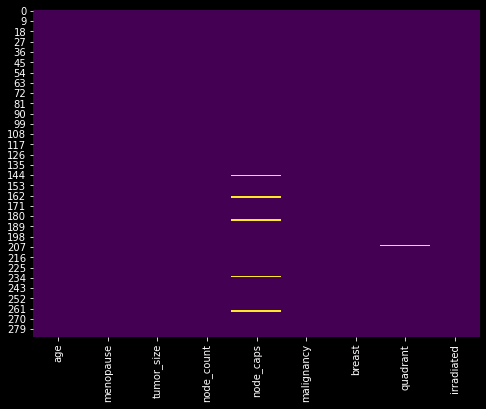

In [423]:
X.replace('?',np.nan,inplace=True)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(X.isnull(), cbar=False,cmap='viridis')

In [424]:
X[pd.isna(X.quadrant)]

,age,menopause,tumor_size,node_count,node_caps,malignancy,breast,quadrant,irradiated
206,50-59,ge40,30-34,0-2,no,3,left,NaN,no


In [425]:
X[pd.isna(X.node_caps)]

,age,menopause,tumor_size,node_count,node_caps,malignancy,breast,quadrant,irradiated
145,40-49,premeno,25-29,0-2,NaN,2,left,right_low,yes
163,60-69,ge40,25-29,3-5,NaN,1,right,left_up,yes
164,60-69,ge40,25-29,3-5,NaN,1,right,left_low,yes
183,50-59,ge40,30-34,9-11,NaN,3,left,left_up,yes
184,50-59,ge40,30-34,9-11,NaN,3,left,left_low,yes
233,70-79,ge40,15-19,9-11,NaN,1,left,left_low,yes
263,50-59,lt40,20-24,0-2,NaN,1,left,left_up,no
264,50-59,lt40,20-24,0-2,NaN,1,left,left_low,no


> One record is missing a value for quadrant involvement 1 value and there 8 missing records missing node cap values (seemingly completely at random).

### Convert binned columns to numeric

In [426]:
def map_numeric(x):
    try:
        return int(x[:2])
    except ValueError:
        return int(x[:1])
    
map_values = {'left':0,'right':1,'yes':1,'no':0}

X.age        = X.age.map(lambda a: int(a[:2]))
X.tumor_size = X.tumor_size.map(lambda t: map_numeric(t))
X.node_count = X.node_count.map(lambda n: map_numeric(n))
X.breast     = X.breast.map(map_values)
X.irradiated = X.irradiated.map(map_values)

### Remap menopause values

In [427]:
for level in set(X.menopause):
    X[level] = X.menopause.map(lambda x: 1 if x==level else 0)
    
X.drop('menopause',axis=1,inplace=True)

### Now we can use KNN to impute missing values

In [428]:
knn_columns = ['age','tumor_size','node_count','malignancy','breast','irradiated','ge40','lt40','premeno']

for c in ['quadrant','node_caps']:
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn_fit = knn.fit(X[knn_columns][pd.isna(X[c])==False],X[c][pd.isna(X[c])==False])

    X.loc[pd.isna(X[c]),c] = knn.predict(X[knn_columns][pd.isna(X[c])])

<AxesSubplot:>

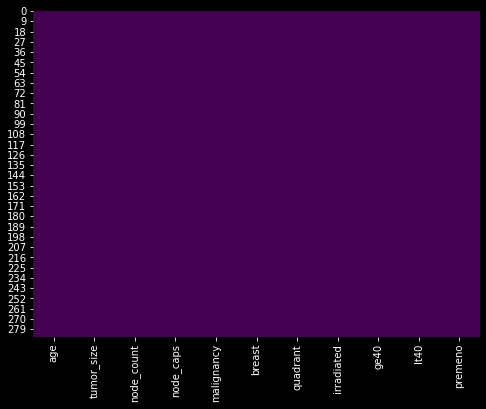

In [429]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(X.isnull(), cbar=False,cmap='viridis')

### Create dummy variables

In [430]:
X = pd.get_dummies(X,columns=['node_caps','quadrant'])

In [431]:
X.head(5)

,age,tumor_size,node_count,malignancy,breast,irradiated,ge40,lt40,premeno,node_caps_no,node_caps_yes,quadrant_central,quadrant_left_low,quadrant_left_up,quadrant_right_low,quadrant_right_up
0,30,30,0,3,0,0,0,0,1,1,0,0,1,0,0,0
1,40,20,0,2,1,0,0,0,1,1,0,0,0,0,0,1
2,40,20,0,2,0,0,0,0,1,1,0,0,1,0,0,0
3,60,15,0,2,1,0,1,0,0,1,0,0,0,1,0,0
4,40,0,0,2,1,0,0,0,1,1,0,0,0,0,1,0


### Train/test split and scale numeric columns

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X,y_binary, test_size=0.3,random_state=1984)

numeric = ['age','tumor_size','node_count','malignancy']
scaler = StandardScaler()

pd.options.mode.chained_assignment = None
X_train.loc[:,numeric] = scaler.fit_transform(X_train[numeric])
X_test.loc[:,numeric]  = scaler.transform(X_test[numeric])
pd.options.mode.chained_assignment = 'warn' 

In [407]:
X_train.head(5)

,age,tumor_size,node_count,malignancy,breast,irradiated,ge40,lt40,premeno,node_caps_no,node_caps_yes,quadrant_central,quadrant_left_low,quadrant_left_up,quadrant_right_low,quadrant_right_up
148,-1.703771,-0.426812,-0.458804,1.271664,0,0,0,0,1,1,0,1,0,0,0,0
168,0.312526,-1.370043,-0.458804,-0.081170,1,0,0,0,1,1,0,0,0,1,0,0
191,-0.695622,0.044803,-0.458804,-0.081170,0,1,0,0,1,1,0,0,0,1,0,0
124,1.320675,-1.370043,-0.458804,-1.434005,1,0,1,0,0,1,0,0,1,0,0,0
24,0.312526,0.988034,-0.458804,-0.081170,1,0,0,0,1,1,0,0,0,1,0,0


### Train model

In [433]:
regression = sm.Logit(y_train,X_train).fit()

y_test_pred  = regression.predict(X_test).map(prob_class).map(label_map_2)
y_train_pred = regression.predict(X_train).map(prob_class).map(label_map_2)

print(f'\nTraining Set Accuracy:\n\t {accuracy_score(y_train.map(label_map_2), y_train_pred)}')
print(f'Test Set Accuracy:\n\t {accuracy_score(y_test.map(label_map_2),y_test_pred)}')

confusion = pd.crosstab(y_test.map(label_map_2), y_test_pred)
confusion.index.name   = 'Observed'
confusion.columns.name = 'Predicted'

confusion

Optimization terminated successfully.
         Current function value: 0.502366
         Iterations 29

Training Set Accuracy:
	 0.76
Test Set Accuracy:
	 0.7209302325581395


Predicted,no-recurrence-events,recurrence-events
Observed,,
no-recurrence-events,53,6
recurrence-events,18,9


### Performance
> The model performed reasonably well as far as total accuracy, though the false negative rate is not great -- the model missed 2/3 of recurrent cancers. Ideally, the model would favor false positives so as to minimize missing cancer recurrences.

In [371]:
coefficients = regression.params.sort_values(ascending=False)
regression_regularized.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                    Logit                  Pseudo R-squared:       0.166     
Dependent Variable:       y                      AIC:                    228.9466  
Date:                     2021-08-07 16:05       BIC:                    275.1230  
No. Observations:         200                    Log-Likelihood:         -100.47   
Df Model:                 13                     LL-Null:                -120.43   
Df Residuals:             186                    LLR p-value:            0.00014270
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           29.0000                                                  
-----------------------------------------------------------------------------------
                    Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
-----------------------------------------------------------------------------------
age                 0.0779       0.2577  0.3024 0.7624        -0.4272        0.5831
tumor_size          0.2575       0.1942  1.3257 0.1849        -0.1232        0.6382
node_count          0.4044       0.2363  1.7111 0.0871        -0.0588        0.8675
malignancy          0.6473       0.2027  3.1937 0.0014         0.2501        1.0446
breast             -0.3384       0.3989 -0.8484 0.3962        -1.1202        0.4434
irradiated          0.5249       0.4110  1.2772 0.2015        -0.2806        1.3305
ge40               -0.7055 5114924.1957 -0.0000 1.0000 -10025067.9127 10025066.5017
lt40                0.4830 5114924.1957  0.0000 1.0000 -10025066.7242 10025067.6902
premeno            -0.3542 5114924.1957 -0.0000 1.0000 -10025067.5614 10025066.8530
node_caps_no       -0.3803          nan     nan    nan            nan           nan
node_caps_yes      -0.1964          nan     nan    nan            nan           nan
quadrant_central   -0.1008 7445060.0059 -0.0000 1.0000 -14592049.5750 14592049.3734
quadrant_left_low  -0.2161 7445060.0059 -0.0000 1.0000 -14592049.6903 14592049.2581
quadrant_left_up   -0.4898 7445060.0059 -0.0000 1.0000 -14592049.9640 14592048.9844
quadrant_right_low -0.1643 7445060.0059 -0.0000 1.0000 -14592049.6385 14592049.3099
quadrant_right_up   0.3943 7445060.0059  0.0000 1.0000 -14592049.0799 14592049.8685
===================================================================================

"""

[Text(0.5, 0, 'Coefficient'),
 Text(0.5, 1.0, 'Logistic Regression Coefficients')]

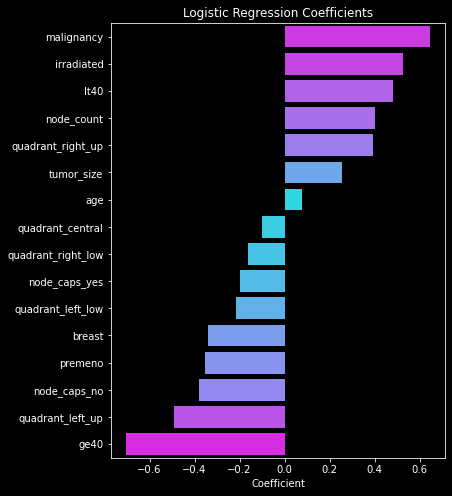

In [389]:
fig, ax = plt.subplots(figsize=(6,8))

p = sns.barplot(y=coefficients.index,
                x=coefficients.values,
                hue=abs(coefficients.values),
                palette='cool',
                dodge=False)
plt.legend([],[], frameon=False)
ax.set(xlabel='Coefficient',title='Logistic Regression Coefficients')

>Looking at the coeffecients can give us a sense of how impactful each of the features have on the recurrence of breast cancer. Malignancy, having undergone irriation, being in late menopause, number of nodes involved, lack of node caps, and tumor size all had positive correlations with cancer recurrence. 

>Being in early menopause, left upper quadrant involvement, being premenopausal, and right breast involvement had negative correlations with cancer recurrence. Of lesser importance were cancers located in either lower quadrant or centrally, age, and lack of node caps.

>With this, a potential cancer recurrence risk score could be developed using the probability output of the regression.